# Do Large Historical Events have an Impact on Seattle’s Crime Rate?

Ella Foley

HCDE 410 A7

University of Washington, Spring 2021

### Table of Contents

Introduction

Background

Research Question

Methodology

Findings

Discussion

Conclusion

### Introduction

I'm planning to do this analysis because I’m curious to see if there’s an increase/decrease (or no change) and in what types of crime based on large events that happen.

It would be interesting to see if there’s any unexpected crime statistics correlating with historical events. This could be useful to know so that if similar events happen again in the future (i.e. “history repeating itself”), we can know what we can expect to see for crime and thus hopefully prevent it better. 

I hope to learn about the impact that historical events have on crime rates and the type of crimes committed, specifically in the Seattle area. I will look at these specific events: Trump's presidential election, COVID-19, and George Floyd’s death.

#### Data

Find the dataset [here](https://data.seattle.gov/Public-Safety/SPD-Crime-Data-2008-Present/tazs-3rd5).

This dataset is under a Public Domain license.

I chose this dataset because I’m particularly interested in crime in Seattle since I’ve lived around this area my whole life and will be moving there this Fall. Additionally, this is a large dataset (with about 900k rows) that comes from the Seattle Police Department, meaning that my analysis is be more likely to be accurate.

#### Dataset Ethical Considerations

Something to keep in mind when using this dataset and doing this type of analysis is where the data comes from. Only finalized reports are included, so crimes that don’t make it through the police department would be absent and unaccounted for. In addition, many people (particularly people of color) do not trust the police and may not make police reports, even after a crime has occurred. For this reason, the data will have bias to it and will not be a completely accurate representation of crime in Seattle. If people don’t acknowledge this, it could lead to poor decisions based on this data, such as only benefiting those who made police reports. It’s also worth noting that a lot of information is included in this dataset, so it would likely not be too difficult for someone to figure out who was involved in the crimes.

#### Unknowns

I’ll be getting my second dose of the vaccine in a couple weeks, which may push back some of my work. I’m also not very comfortable with Python and haven’t used it for statistical analysis before, so I expect to run into a lot of problems related to that.

### Background

The online newspaper SeattlePI reported that there was a 48.57% increase in homicides in Seattle from 2019 to 2020 and that this increase appeared in other US cities during that same time period as well, showing that crime can fluctuate dramatically. The [article](https://www.google.com/amp/s/www.seattlepi.com/local/seattlenews/amp/2020-crime-Seattle-highest-homicide-rate-15864266.php) also mentioned that bodies that were just discovered that year that threw off the number, which is why it’s important to differentiate between the date a crime actually occurred and the date it was reported (as I will be doing in my research). It was additionally noted that property crimes increased, but that a possible reason for this could be the increase in Seattle’s population. This is something that I will need to mention in my analysis as well.

According to this [study](https://www.bjs.gov/content/pub/pdf/ics.pdf) from the Bureau of Justice, there is little relationship between the seasons and crime for most types of crime. However, they still suggested taking into account seasonal fluctuation for crime for the sake of quality data analysis. This relationship can vary based on the location of the crime (which is why I will be focusing solely on Seattle) and how crime is reported by the police (which is why I will be using one dataset for all the crime data in hopes of mitigating this variance).

A [research paper](https://poseidon01.ssrn.com/delivery.php?ID=724017066103122088120029027099089022026080077013030029112113018026093025106080082073011056033056027005107125092126030067066001046072056061077089122127084103124099089028058087083108115094089030083084094015102018064027072098104111085009014111088099097093&EXT=pdf&INDEX=TRUE) titled “The Effect of President Trump’s Election on Hate Crimes” investigated the impact that Trump’s election had on hate crime specifically and did find a statistically significant increase, proving that major events can indeed impact crime rates. However, this only researched hate crimes in particular and not overall crime rates, which would be interesting to discover if there’s also a possible impact. 

### Research Questions

Have major historical events (such as Trump’s 2016 presidential election, the COVID-19 pandemic, and the death of George Floyd) affected the amount of crime in Seattle?

### Methodology

I will be using descriptive statistics (mainly crime counts) for my analysis. Data visualizations in the form of line graphs will also be included. 

I’ll begin by cleaning the data by removing all crime reports from before the year 2008 since the report dates for this dataset does not begin until that year (earlier years are included for crime that was committed before 2008 but was not reported until that year; however, including these crimes would throw off the analysis). Crimes from the year 2021 will be included with the exception of May 2021 since that month will not be finished by the time I begin analyzing the data. Additionally, since crimes that fell under multiple categories for the type of crime were inputted multiple times into this dataset, I will be merging these data entries together (by assuming that entries with the same date, time, and location are for the same crime). 

After this data cleaning, I will find the daily average number of crimes committed for each month present in my dataset. The average was chosen as this will provide a detailed analysis with little chance of outliers impacting the results since I will be using data from months. I will do this by adding up all of the crime counts for each month and then dividing that number by the number of days in that month. In the case that this number is quite small, I will multiply it by the average number of days in a month to make it easier to understand. I will do this for each month in my dataset. I plan to also account for leap years in order to increase the accuracy of my analysis.

To reduce possible outside factors that could skew my results, I plan to make a line graph for each year (2008-2021) with the daily average number of crimes committed for each month of that year plotted. By comparing these graphs, I can see if there is any seasonal variation that may throw off my results (e.g. there are more/less crimes committed in winter than summer). From there, I plan to create a seasonal index and use that in combination with the daily average number of crimes committed for each month to determine if the crime rate after a particularly important event was actually impacted or if it was the result of outside factors (ideally, I would account for other factors as well, but that’s out of the scope for this project).

This information will be put on a line graph to visualize. The daily average number of crimes committed for each month will also be included on each of my 3 line graphs for large events (Trump’s election, George Floyd’s death, and the COVID-19 pandemic). For example, for the pandemic graph, the months included will be from March 2020 (since this is when the pandemic started) up until the end of the dataset in April 2021 (as the pandemic was still drastically affecting people at this time). This will allow me to see how crime was potentially impacted by these 3 events. 

### Findings

To run this code, let’s first import what we'll eventually need for the data analysis.

In [285]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
#The following imports are for the excel export used, but not necessary.
#import xlwt
#import xlsxwriter

Now we can import the CSV and clean it up a little by getting rid of uneccessary columns, converting the data to datetime, sorting the data (it should be sorted already, but this was done to confirm), and merging any repeated data entries together.

In [286]:
#Imports csv.
df = pd.read_csv (r"./SPD_Crime_Data__2008-Present.csv")

#Chooses only the necessary columns for this data analysis.
df = df[['Report Number', 'Offense Start DateTime']]

#Converts date to datetime.
df['Offense Start DateTime'] = pd.to_datetime(df['Offense Start DateTime'], format='%m/%d/%Y %H:%M:%S %p')

#Sorts data as a precaution.
df.sort_values('Offense Start DateTime', inplace=True)

#Merges repeated data entires together based on report number and using the first offense start datetime (if there are multiple start dates present).
unique_df = df.groupby(['Report Number']).agg({'Offense Start DateTime': np.min})
unique_df['Year-Month Sortable'] = unique_df['Offense Start DateTime'].dt.strftime("%Y-%m")

We can check to make sure this worked by adding a print statement for unique_df.

In [287]:
print(unique_df)

              Offense Start DateTime Year-Month Sortable
Report Number                                           
1010-217158      2020-07-18 05:00:00             2020-07
1919-368471      2019-10-02 08:08:00             2019-10
20 21-69987      2021-03-22 02:15:00             2021-03
2001-067145      2021-03-19 11:58:00             2021-03
2002-211035      2020-07-11 10:42:00             2020-07
...                              ...                 ...
21-00009462                      NaT                 NaN
21-00009715      2021-01-12 07:42:00             2021-01
2120-095490      2021-04-19 05:00:00             2021-04
2921-124760      2021-05-21 11:45:00             2021-05
3029-400689      2019-10-26 07:00:00             2019-10

[842571 rows x 2 columns]


Looks good! Now we can get started on the actual analysis part by first finding out the average number of crimes committed for each month in our dataset.

In [288]:
#Finding the total number of crimes per month.
month_df = unique_df.groupby([unique_df['Year-Month Sortable']]).agg({'Year-Month Sortable':'count'}).rename(columns={'Year-Month Sortable':'Offenses'}).reset_index()

#Adding fields that will be used later.
month_df['Year-Month DateTime'] = pd.to_datetime(month_df['Year-Month Sortable'], format='%Y-%m')
month_df['Year-Month Friendly'] = month_df['Year-Month DateTime'].dt.strftime("%b %Y")
month_df['Month'] = month_df['Year-Month DateTime'].dt.strftime("%b")

#Finds the daily average crime reports and takes into account months with a different number of days (and leap years).
month_df['Days In Month'] = month_df['Year-Month DateTime'].dt.daysinmonth
month_df['Offenses Daily'] = month_df['Offenses'] / month_df['Days In Month']

We'll filter out any reports that are outside of our time frame for this analysis (anything before 2008 or after April 2021).

In [289]:
#Filters data to remove extraneous results outside of the analysis time period.
filtered_df = month_df.loc[(month_df['Year-Month DateTime'] >= '2008-01-01') & (month_df['Year-Month DateTime'] < '2021-05-01')]
filtered_df.set_index('Year-Month DateTime')

,Year-Month Sortable,Offenses,Year-Month Friendly,Month,Days In Month,Offenses Daily
Year-Month DateTime,,,,,,
2008-01-01,2008-01,4483,Jan 2008,Jan,31,144.612903
2008-02-01,2008-02,4387,Feb 2008,Feb,29,151.275862
2008-03-01,2008-03,4646,Mar 2008,Mar,31,149.870968
2008-04-01,2008-04,4514,Apr 2008,Apr,30,150.466667
2008-05-01,2008-05,4982,May 2008,May,31,160.709677
...,...,...,...,...,...,...
2020-12-01,2020-12,5525,Dec 2020,Dec,31,178.225806
2021-01-01,2021-01,5122,Jan 2021,Jan,31,165.225806
2021-02-01,2021-02,4524,Feb 2021,Feb,28,161.571429


Now that we've cleaned and organized the data, we can start creating the visualizations! Let's begin by creating a line graph displaying the average monthly crime rate during Trump's presidency.

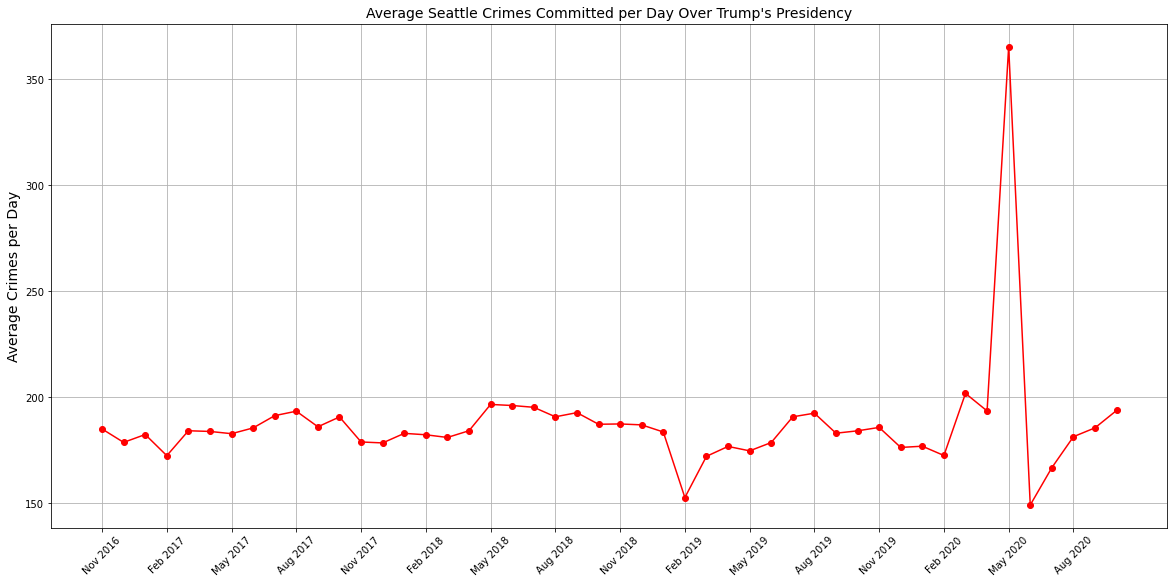

In [290]:
#Shows a monthly analysis for November 2016 to November 2020 (Trump's presidency time period).
plot2 = normalized_df.loc[(normalized_df['Year-Month DateTime'] >= '2016-11-01') & (normalized_df['Year-Month DateTime'] < '2020-11-01')]
plt.plot(plot2['Year-Month Friendly'], plot2['Offenses Daily_y'], color='red', marker='o')
plt.title('Average Seattle Crimes Committed per Day Over Trump\'s Presidency', fontsize=14)
plt.xticks(rotation=45)
plt.xticks(np.arange(0,len(plot2),3))
plt.ylabel('Average Crimes per Day', fontsize=14)
plt.grid(True)
plt.subplots_adjust(bottom=0.18)
plt.show()

Interesting! There doesn't seem to be an increase in crime right after the election as might be expected (although this might change if we were to look at specific types of crime like hate crime). Let's see how this graph compares to one during the pandemic.

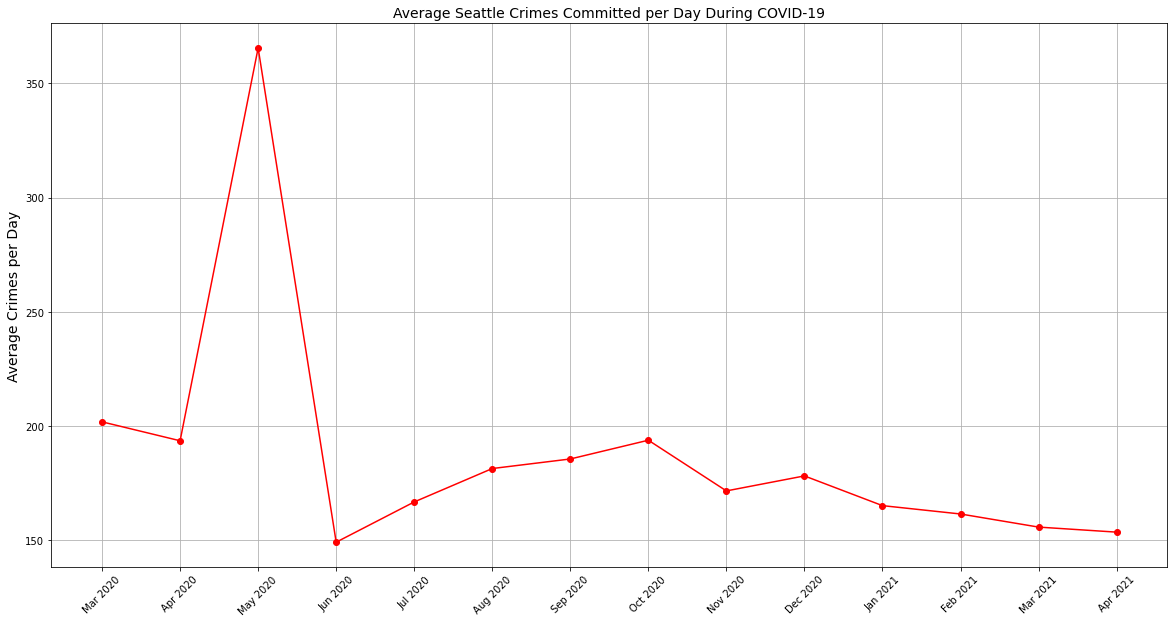

In [291]:
#Shows a monthly analysis for March 2020 to April 2021 (COVID-19 time period).
plot1 = normalized_df.loc[(normalized_df['Year-Month DateTime'] >= '2020-03-01') & (normalized_df['Year-Month DateTime'] < '2021-05-01')]
plt.plot(plot1['Year-Month Friendly'], plot1['Offenses Daily_y'], color='red', marker='o')
plt.title('Average Seattle Crimes Committed per Day During COVID-19', fontsize=14)
plt.ylabel('Average Crimes per Day', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Since this analysis of COVID-19 overlaps some with Trump’s presidency, it makes it difficult to see the exact potential impact an event had on crime. However, analysis done in Excel (see how to export to Excel at the end of this code) shows that the average number of crimes per month for the year 2016-2019 was ~183, which is higher than the average number of crimes in the years 2008-2015 at an average of ~164 (so a ~12% increase), and the average number of crimes for the year 2020 was a record high ~195 (a ~19% increase). This means that the amount of crime increased during Trump's presidency and even more so during the pandemic (although, again, we're not sure what type of crime).

Something that sticks out when looking at this graph is the large spike in crime in May 2020 (the month of George Floyd's death). Across the years 2008-2019, the average monthly crime count in May hovered at ~173, but for the year 2020, it rose to an incredibly high ~365 (a ~111% increase).

But was this increase in crime actually a result of George Floyd's death? To help answer this, let's create a graph that now shows an in-depth weekly analysis for this time period.

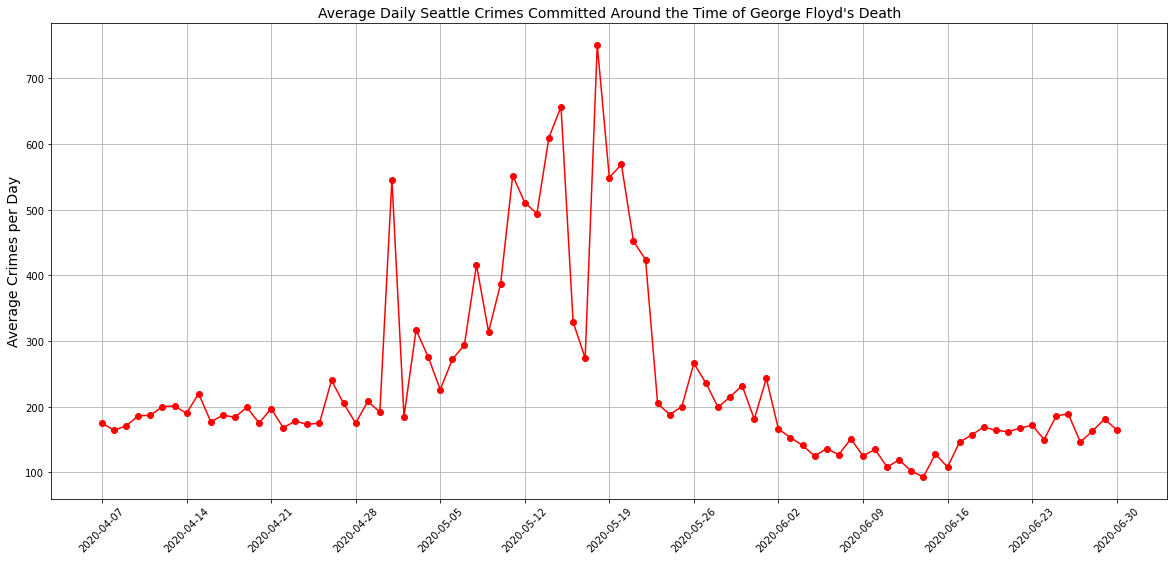

In [292]:
#Shows a detailed weekly analysis for April-June 2020 (the time period surrounding George Floyd's death).
unique_df['Date'] = unique_df['Offense Start DateTime'].dt.strftime("%Y-%m-%d")
daily_df = unique_df.groupby([unique_df['Date']]).agg({'Date':'count'}).rename(columns={'Date':'Offenses'}).reset_index()
daily_df['Date DateTime'] = pd.to_datetime(daily_df['Date'], format='%Y-%m-%d')
daily_df = daily_df.loc[(daily_df['Date DateTime'] >= '2020-04-07') & (daily_df['Date DateTime'] < '2020-07-01')]
daily_df.set_index('Date DateTime')
plt.plot(daily_df['Date'], daily_df['Offenses'], color='red', marker='o')
plt.title('Average Daily Seattle Crimes Committed Around the Time of George Floyd\'s Death', fontsize=14)
plt.xticks(rotation=45)
plt.xticks(np.arange(0,len(daily_df),7))
plt.ylabel('Average Crimes per Day', fontsize=14)
plt.grid(True)
plt.subplots_adjust(bottom=0.22)
plt.show()

While the increase in crime initially appeared to be related to the death of George Floyd, a closer weekly analysis reveals something else: the large spike in crime actually happened in the weeks before his death (which was on May 25). Further analysis (that’s out of scope for this project) would have to be conducted to reveal any potential reasons for that increase.

Now let's see if seasonality has an impact on the crime rate so we can decide if it's necessary to account for this in our analysis.

To begin, I borrowed a function from someone who did a similar project [here](https://github.com/bstuddard/python-examples/blob/master/seasonal-decomp/python-logic/helpers.py).

In [293]:
#Creates new columns for a seasonality index.
def combine_seasonal_cols(input_df, seasonal_model_results):
    #Adds these new columns to the original dataset.
    input_df['observed'] = seasonal_model_results.observed
    input_df['residual'] = seasonal_model_results.resid
    input_df['seasonal'] = seasonal_model_results.seasonal
    input_df['trend'] = seasonal_model_results.trend

Next, we'll calculate the seasonality and add it to our dataframe. 

In [294]:
#Looks at seasonality to identify any adjustments needed.
season_df = filtered_df[['Year-Month DateTime', 'Offenses Daily']].copy()
season_df.sort_values('Year-Month DateTime', inplace=True)
season_df.set_index('Year-Month DateTime', inplace=True)
season_sd = seasonal_decompose(season_df, period=12)
combine_seasonal_cols(season_df, season_sd)

#Adds this seasonality to the original filtered dataframe.
normalized_df = pd.merge(filtered_df, season_df, on="Year-Month DateTime")
normalized_df['Normalized Daily'] = normalized_df['Offenses Daily_y'] - normalized_df['seasonal']

#Drops unused columns and rebuilds Year-Month DateTime.
normalized_df.drop(['Year-Month DateTime', 'Offenses Daily_x', 'observed', 'residual', 'trend'], axis=1)
normalized_df['Year-Month DateTime'] = pd.to_datetime(normalized_df['Year-Month Sortable'], format='%Y-%m')
normalized_df.set_index('Year-Month DateTime')

,Year-Month Sortable,Offenses,Year-Month Friendly,Month,Days In Month,Offenses Daily_x,Offenses Daily_y,observed,residual,seasonal,trend,Normalized Daily
Year-Month DateTime,,,,,,,,,,,,
2008-01-01,2008-01,4483,Jan 2008,Jan,31,144.612903,144.612903,144.612903,NaN,-1.581351,NaN,146.194254
2008-02-01,2008-02,4387,Feb 2008,Feb,29,151.275862,151.275862,151.275862,NaN,-11.307809,NaN,162.583671
2008-03-01,2008-03,4646,Mar 2008,Mar,31,149.870968,149.870968,149.870968,NaN,-2.641114,NaN,152.512082
2008-04-01,2008-04,4514,Apr 2008,Apr,30,150.466667,150.466667,150.466667,NaN,-1.755672,NaN,152.222338
2008-05-01,2008-05,4982,May 2008,May,31,160.709677,160.709677,160.709677,NaN,16.672789,NaN,144.036888
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-01,2020-12,5525,Dec 2020,Dec,31,178.225806,178.225806,178.225806,NaN,-7.062161,NaN,185.287967
2021-01-01,2021-01,5122,Jan 2021,Jan,31,165.225806,165.225806,165.225806,NaN,-1.581351,NaN,166.807158
2021-02-01,2021-02,4524,Feb 2021,Feb,28,161.571429,161.571429,161.571429,NaN,-11.307809,NaN,172.879237


Now we can create visualizations of this seasonality to determine if it has any impact on crime rate. We'll begin by taking a look at the seasonality for each month and creating a line graph for this. 

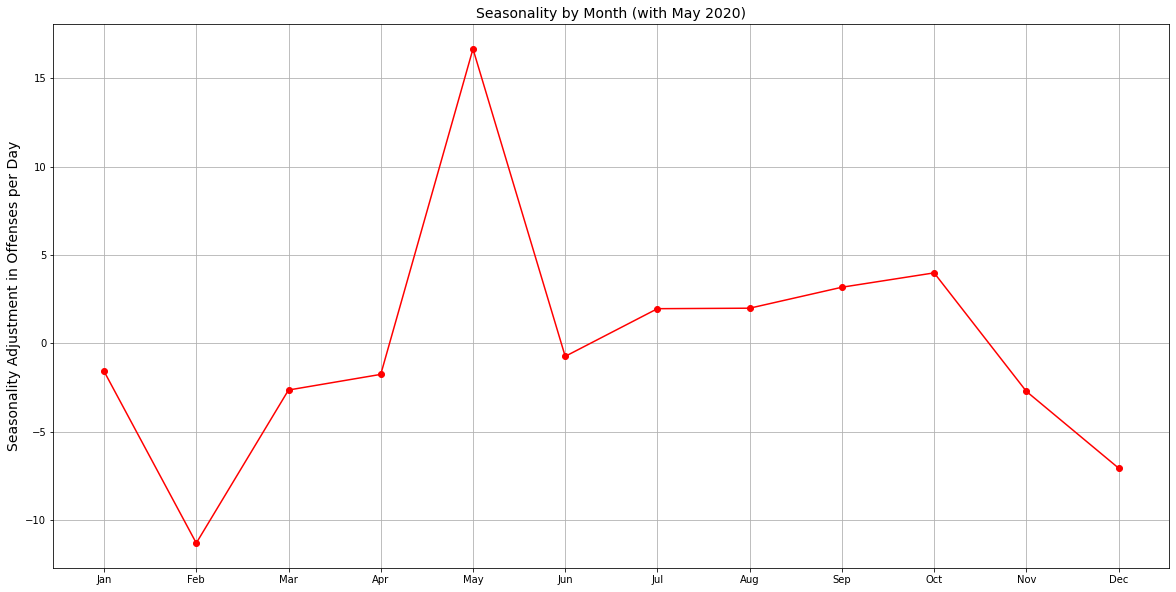

In [295]:
#Shows seasonality adjustments per month when considering full date range.
#Any year can be chosen as the seasonality index should be the same for each one.
plot_seasonality = normalized_df.loc[(normalized_df['Year-Month DateTime'] >= '2019-01') & (normalized_df['Year-Month DateTime'] < '2020-01')]
plt.plot(plot_seasonality['Month'], plot_seasonality2['seasonal'], color='red', marker='o')
plt.title('Seasonality by Month (with May 2020)', fontsize=14)
plt.ylabel('Seasonality Adjustment in Offenses per Day', fontsize=14)
plt.grid(True)
plt.show()

This visualization shows what the crime rate looks like over the years when seasonality is taken into account. The May month looks abnormal, which could be because of the unusually large amount of crime in May 2020, so let’s see what the seasonality looks like when we don’t take this month into account.

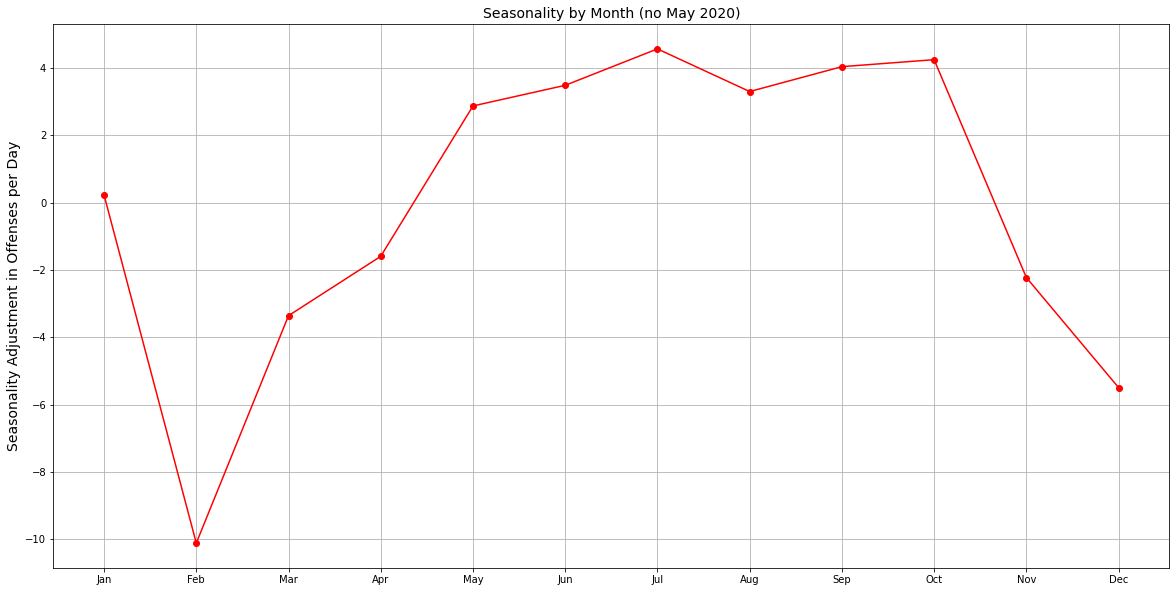

In [296]:
#Recalculates seasonality adjustments per month without the outlier in May 2020.
season_df2 = month_df.loc[(month_df['Year-Month DateTime'] >= '2008-01-01') & (month_df['Year-Month DateTime'] < '2020-04-01')] 
season_df2.set_index('Year-Month DateTime')
season_df2 = season_df2[['Year-Month DateTime', 'Offenses Daily']]
season_df2.sort_values('Year-Month DateTime', inplace=True)
season_df2.set_index('Year-Month DateTime', inplace=True)
season_sd2 = seasonal_decompose(season_df2, period=12)
combine_seasonal_cols(season_df2, season_sd2)

#Adds this seasonality to the original filtered dataframe.
normalized_df2 = pd.merge(filtered_df, season_df2, on="Year-Month DateTime")
normalized_df2['Normalized Daily'] = normalized_df2['Offenses Daily_y'] - normalized_df2['seasonal']

#Drops unused columns and rebuilds Year-Month DateTime.
normalized_df2.drop(['Year-Month DateTime', 'Offenses Daily_x', 'observed', 'residual', 'trend'], axis=1)
normalized_df2['Year-Month DateTime'] = pd.to_datetime(normalized_df2['Year-Month Sortable'], format='%Y-%m')
normalized_df2.set_index('Year-Month DateTime')

#Shows the crime rates with the monthly seasonality adjustments.
plot_seasonality = normalized_df2.loc[(normalized_df2['Year-Month DateTime'] >= '2019-01') & (normalized_df2['Year-Month DateTime'] < '2020-01')]
plt.plot(plot_seasonality['Month'], plot_seasonality['seasonal'], color='red', marker='o')
plt.title('Seasonality by Month (no May 2020)', fontsize=14)
plt.ylabel('Seasonality Adjustment in Offenses per Day', fontsize=14)
plt.grid(True)
plt.show()

Now the only month that seems abnormal is February, but let’s see if that actually has a large impact. To do this, we can first create a line graph showing crime rate before seasonality is taken into account.

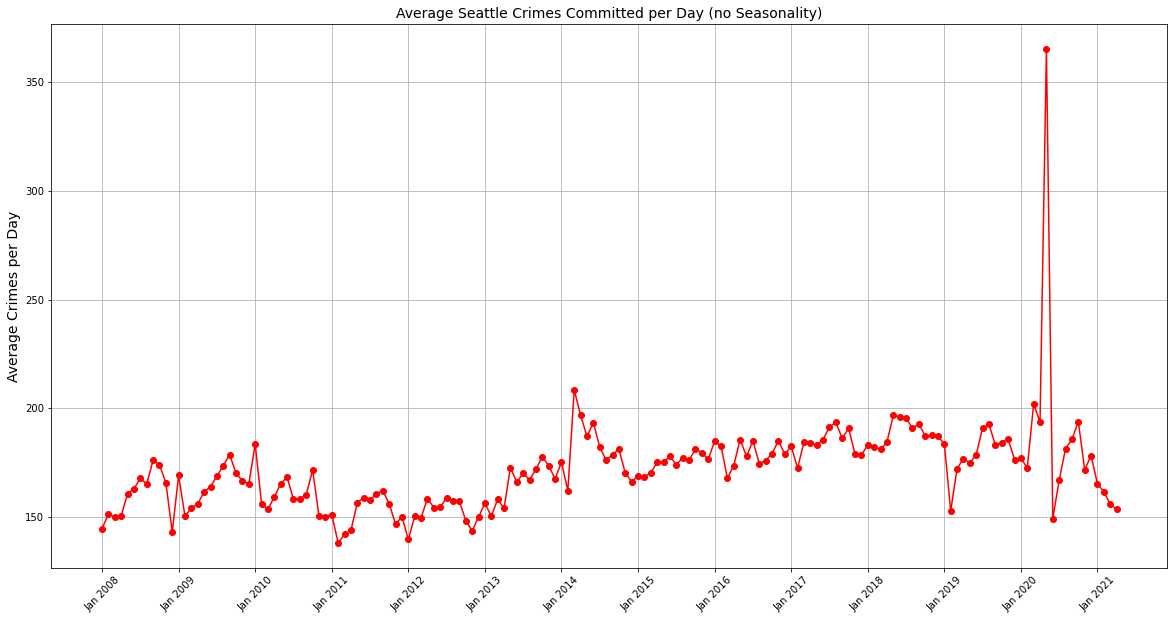

In [297]:
#Plots all in-scope data without seasonality.
plot5 = normalized_df.loc[(normalized_df['Year-Month DateTime'] >= '2008-01-01') & (normalized_df['Year-Month DateTime'] < '2021-05-01')]
plt.plot(plot5['Year-Month Friendly'], plot5['Offenses Daily_y'], color='red', marker='o')
plt.title('Average Seattle Crimes Committed per Day (no Seasonality)', fontsize=14)
plt.xticks(np.arange(0,len(plot4),12))
plt.xticks(rotation=45)
plt.ylabel('Average Crimes per Day', fontsize=14)
plt.grid(True)
plt.show()

Looks good! Now that we have this, let’s create a line graph that shows crime rate after seasonality is taken into account.

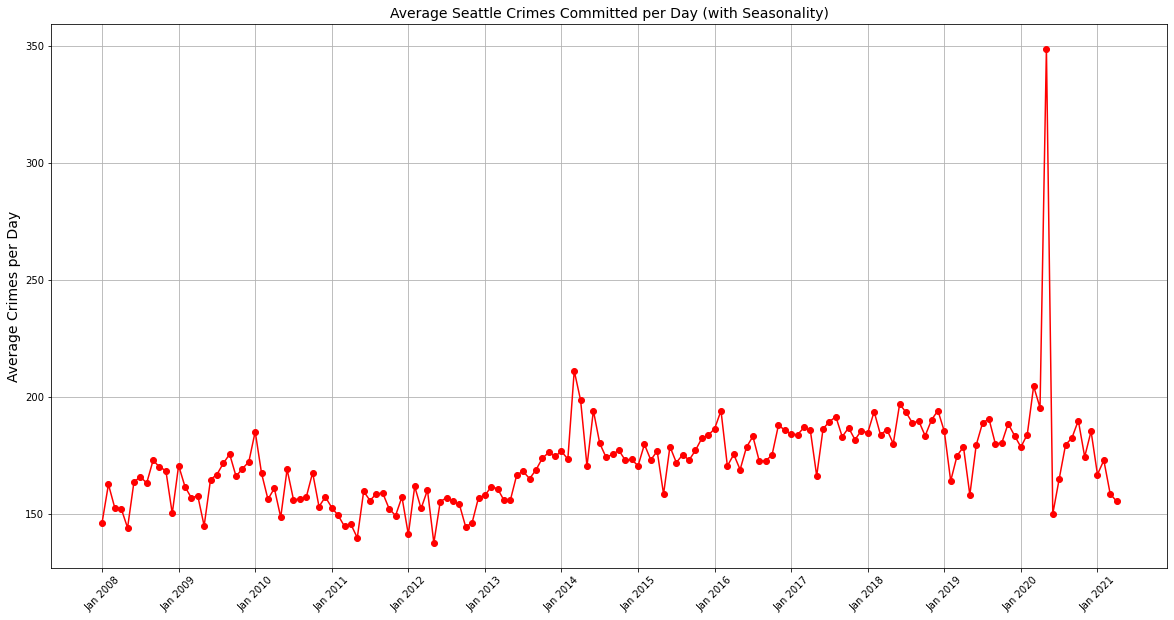

In [298]:
#Plots all in-scope data (with seasonality taken into account).
plot4 = normalized_df.loc[(normalized_df['Year-Month DateTime'] >= '2008-01-01') & (normalized_df['Year-Month DateTime'] < '2021-05-01')]
plt.plot(plot4['Year-Month Friendly'], plot4['Normalized Daily'], color='red', marker='o')
plt.title('Average Seattle Crimes Committed per Day (with Seasonality)', fontsize=14)
plt.xticks(np.arange(0,len(plot4),12))
plt.xticks(rotation=45)
plt.ylabel('Average Crimes per Day', fontsize=14)
plt.grid(True)
plt.show()

By comparing these before and after graphs of seasonality, seasonality doesn’t appear to have a large impact on crime rate. This makes sense since the monthly crime rate in February only changed by about 10 crime reports, which is a small amount when compared to the 100+ crime reports that usually happen each month. For this reason, seasonality won’t be applied to my time period graphs and we’ll just leave them as we already have them to reduce complexity and potential bias from the May 2020 outlier.

### Discussion

The slight increase in crime rate during Trump’s presidency is an interesting finding, but since all types of crime were included in this analysis, it still leaves some questions unanswered. Was this mostly hate crime or something completely unrelated? My study provides the groundwork for further research on that topic. The type of crimes committed would also be good to know for understanding crime rate during the pandemic. Perhaps the majority of crime went down, but a couple specific types increased drastically and threw the rest of the numbers off. Additionally, there is a chance that this increase might not be significant since population would likely be increasing as well and this wasn’t taken into account for this analysis. Future research could include Seattle population data to answer this question. 

Most interestingly, a deeper dive into what exactly was happening during May 2020 should be done. My research indicates that something significant happened with crime during that time period, but whether this was because of George Floyd’s death or something else won’t be known until further research is conducted in this area.

As briefly mentioned earlier, a major limitation of this project is that these major events overlapped with each other (as well as other smaller events that occurred too) and so it’s difficult to decide the exact impact that an event had on crime rate. Something else worth mentioning is that I only used data from crimes that were reported, so the data is biased towards individuals who report crime. Further expansions could include crime rates for cities outside of Seattle (particularly in less democratic places, the Minneapolis area, and places that were hit more/less hard by the pandemic).

### Conclusion

This study found that major historical events do indeed have some kind of impact on the amount of crime in Seattle. Crime increased during the time of Trump’s presidency and even more so during the pandemic. In addition, a large spike in crime happened right before the death of George Floyd. However, the exact causes of this crime increase have yet to be determined. Interestingly, Seattle crime does not seem to vary much by season, which brings an interesting take to the discussion of if more crimes happen in the summer than the winter.